In [1]:
# import tensoflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

In [2]:
np.random.seed(1337)

#-- Cargar sólo las imágenes sin las etiquetas ---
(x_train, _), (x_test, _) = mnist.load_data()
input_dim = 28*28
x_train = np.reshape(x_train, [-1, input_dim])/255.0
x_test = np.reshape(x_test,   [-1, input_dim])/255.0

print(x_train.shape,x_test.shape,input_dim)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 784) (10000, 784) 784


In [3]:
input_img = layers.Input(shape=(784,), name='encoder_input')
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu', name='latent_vector')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid',name='decoder_output')(decoded)

autoencoder = Model(input_img, decoded)
print(autoencoder.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
H = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3345 - val_loss: 0.1604
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1534 - val_loss: 0.1371
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1349 - val_loss: 0.1240
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1229 - val_loss: 0.1169
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1170 - val_loss: 0.1118
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1127 - val_loss: 0.1081
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1091 - val_loss: 0.1058
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1065 - val_loss: 0.1037
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1042 - val_loss: 0.1018
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1024 - val_loss: 0.1001
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1010 - val_loss: 0.0990
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━

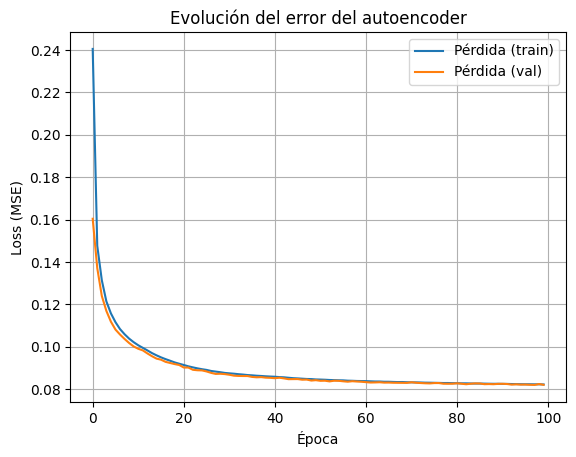

In [5]:
import matplotlib.pyplot as plt

# Graficar la evolución del error
plt.plot(H.history['loss'], label='Pérdida (train)')
plt.plot(H.history['val_loss'], label='Pérdida (val)')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error del autoencoder')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluar_reconstruccion(autoencoder, datos, nombre=""):
    # Predicción del Autoencoder
    datos_reconstruidos = autoencoder.predict(datos)

    # Aplanar imágenes para comparar
    datos_flat = datos.reshape((datos.shape[0], -1))
    datos_reconstruidos_flat = datos_reconstruidos.reshape((datos_reconstruidos.shape[0], -1))

    # Cálculo de errores
    mse = mean_squared_error(datos_flat, datos_reconstruidos_flat)
    mae = mean_absolute_error(datos_flat, datos_reconstruidos_flat)

    print(f"[{nombre}] MSE: {mse:.6f} | MAE: {mae:.6f}")
    #return mse, mae

# Evaluar en entrenamiento
evaluar_reconstruccion(autoencoder, x_train, nombre="Entrenamiento")

# Evaluar en testeo
evaluar_reconstruccion(autoencoder, x_test, nombre="Testeo")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[Entrenamiento] MSE: 0.006796 | MAE: 0.026143
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[Testeo] MSE: 0.006824 | MAE: 0.025997


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


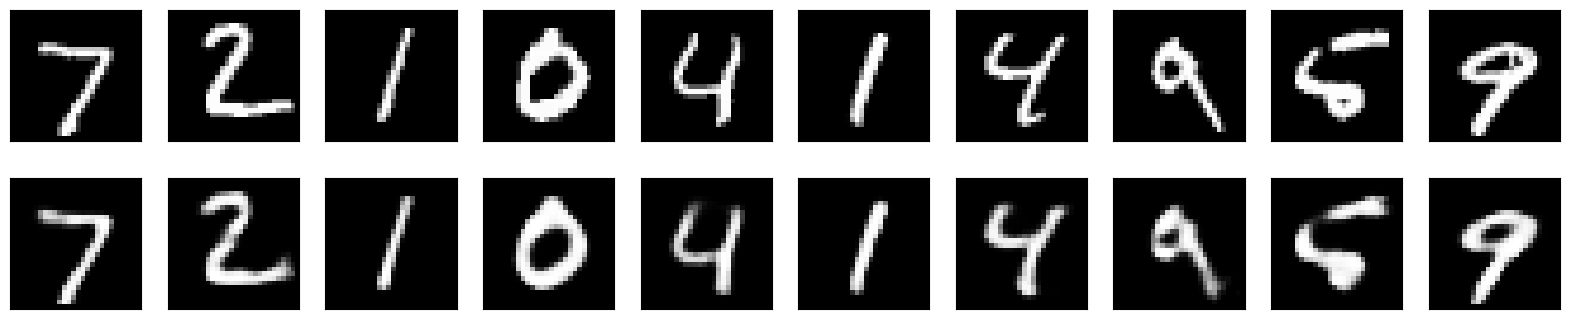

In [7]:
# x_test son las imágenes originales y
# x_decoded contiene las imágenes reconstruidas
x_decoded = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
